### Carregando os Dados

Vamos carregar nosso dataset.

In [48]:
import pandas as pd

df = pd.read_excel("datasets/dataset.xlsx")

In [49]:
df.head()

,Age at diagnosis,Regional nodes positive (1988+),Total number of in situ/malignant tumors for patient,Radiation recode,Chemotherapy recode,Radiation sequence with surgery,ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),CS tumor size (2004-2015),Derived HER2 Recode (2010+),Regional nodes examined (1988+),COD to site recode,Race recode,Sex,Vital status recode (study cutoff used),Diagnosis_year,Last_fu _year,interva_years,stutus_5_years
0,54,3,1,Beam radiation,Yes,Radiation after surgery,Negative,Negative,25,Positive,14,Alive,White,Female,Alive,2011,2016,5,Alive
1,59,3,1,Beam radiation,Yes,Radiation after surgery,Positive,Negative,36,Negative,19,Alive,White,Female,Alive,2011,2016,5,Alive
2,54,0,2,Beam radiation,No/Unknown,Radiation after surgery,Positive,Positive,6,Negative,5,Alive,White,Female,Alive,2010,2016,6,Alive
3,58,0,1,Beam radiation,No/Unknown,Radiation after surgery,Positive,Positive,1,Negative,1,Alive,White,Female,Alive,2010,2016,6,Alive
4,89,0,1,None/Unknown,No/Unknown,No radiation and/or cancer-directed surgery,Negative,Positive,17,Negative,1,Alive,White,Female,Alive,2011,2016,5,Alive


### Limpeza e Tratamento dos Dados

Primeiramente, vamos renomear as variáveis para tornar a análise mais conveniente.

In [50]:
df.columns

Index(['Age at diagnosis', 'Regional nodes positive (1988+)',
       'Total number of in situ/malignant tumors for patient',
       'Radiation recode', 'Chemotherapy recode',
       'Radiation sequence with surgery',
       'ER Status Recode Breast Cancer (1990+)',
       'PR Status Recode Breast Cancer (1990+)', 'CS tumor size (2004-2015)',
       'Derived HER2 Recode (2010+)', 'Regional nodes examined (1988+)',
       'COD to site recode', 'Race recode', 'Sex',
       'Vital status recode (study cutoff used)', 'Diagnosis_year',
       'Last_fu _year', 'interva_years', 'stutus_5_years'],
      dtype='object')

In [51]:
df = df.rename({
    "Age at diagnosis": "diagnosis_age",
    "Regional nodes positive (1988+)": "lymph_nodes",
    "Total number of in situ/malignant tumors for patient": "malignant_tumors",
    "Radiation recode": "radiation_type",
    "Chemotherapy recode": "chemotherapy_done",
    "Radiation sequence with surgery": "radiation_sequence",
    "ER Status Recode Breast Cancer (1990+)": "estrogen_info",
    "PR Status Recode Breast Cancer (1990+)": "progesterone_info",
    "CS tumor size (2004-2015)": "tumor_size",
    "Derived HER2 Recode (2010+)": "her2_info",
    "Regional nodes examined (1988+)": "nodes_examined",
    "COD to site recode": "cause_of_death",
    "Race recode": "race",
    "Sex": "sex",
    "Vital status recode (study cutoff used)": "vital_status",
    "Diagnosis_year": "diagnosis_year",
    "Last_fu _year": "treatment_year",
    "interva_years": "num_screening",
    "stutus_5_years": "vital_status_5y"
}, axis="columns")

df.columns = df.columns.str.strip()

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35349 entries, 0 to 35348
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   diagnosis_age       35349 non-null  int64 
 1   lymph_nodes         35349 non-null  int64 
 2   malignant_tumors    35349 non-null  int64 
 3   radiation_type      35349 non-null  object
 4   chemotherapy_done   35349 non-null  object
 5   radiation_sequence  35349 non-null  object
 6   estrogen_info       35349 non-null  object
 7   progesterone_info   35349 non-null  object
 8   tumor_size          35349 non-null  object
 9   her2_info           35349 non-null  object
 10  nodes_examined      35349 non-null  int64 
 11  cause_of_death      35349 non-null  object
 12  race                35349 non-null  object
 13  sex                 35349 non-null  object
 14  vital_status        35349 non-null  object
 15  diagnosis_year      35349 non-null  int64 
 16  treatment_year      35

Agora, precisamos detectar os dados faltantes e preencher eles com `np.nan` para depois tratarmos eles de maneira adequada. Para isso vamos dar uma olhada nos dados que temos no dataset.

In [53]:
for col in df.columns:
    values = df[col].unique()
    values.sort()
    print(f"{col}: {values}\n")

diagnosis_age: [ 2 15 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87
 88 89 90 91 92 93 94 95 96 97 98 99]

lymph_nodes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 46 48 52 65 76
 95 97 98 99]

malignant_tumors: [1 2 3 4]

radiation_type: ['Beam radiation' 'Combination of beam with implants or isotopes'
 'None/Unknown' 'Radioactive implants (includes brachytherapy) (1988+)'
 'Radioisotopes (1988+)' 'Refused (1988+)']

chemotherapy_done: ['No/Unknown' 'Yes']

radiation_sequence: ['Intraoperative rad with other rad before/after surgery'
 'Intraoperative radiation' 'No radiation and/or cancer-directed surgery'
 'Radiation after surgery' 'Radiation before and after surgery'
 'Radiation prior to surgery' 'Surgery both before and after radiati

Como podemos ver, as variáveis `radiation_type`, `estrogen_info`, `progesterone_info`, `her2_info` e `race` possuem valores faltantes ou desconhecidos. Vamos analisar esses valores para decidir o que fazer com eles.

In [54]:
with_na = ["radiation_type", "estrogen_info", "progesterone_info", 
           "her2_info", "race"]

for col in with_na:
    print(f"{col}: {100*df[col].value_counts(normalize=True)}\n")

radiation_type: radiation_type
Beam radiation                                           49.415825
None/Unknown                                             46.253076
Radioactive implants (includes brachytherapy) (1988+)     2.701632
Refused (1988+)                                           1.372033
Combination of beam with implants or isotopes             0.183881
Radioisotopes (1988+)                                     0.073552
Name: proportion, dtype: float64

estrogen_info: estrogen_info
Positive      77.077145
Negative      18.345639
Unknown        4.483861
Borderline     0.093355
Name: proportion, dtype: float64

progesterone_info: progesterone_info
Positive      65.755750
Negative      29.316247
Unknown        4.783728
Borderline     0.144276
Name: proportion, dtype: float64

her2_info: her2_info
Negative      77.566551
Positive      13.264873
Unknown        7.018586
Borderline     2.149990
Name: proportion, dtype: float64

race: race
White      86.655917
Black      12.863164
Unk

Como podemos ver, os dados faltantes de `radiation_type` são os valores `None/Unknown` e representam $46\%$ da amostra. Portanto, não iremos fazer nada com esses valores pois eles representam uma parte significativa do dataset e podem ter informação relevantes para nós.

Já para as variáveis `estrogen_info`, `progesterone_info`, `her2_info` e `race` os valores faltantes são os valores `Unknown`. Para as três primeiras, temos uma porcentagem muito pequena de valores faltantes, sendo $4.4\%$, $4.7\%$ e $7\%$, respectivamente. Essas porcentagens, apesar de pequenas, podem ter alguma relevância na hora do treinamento, portanto vamos manter seus dados faltantes. 

Por fim, a variável `race` tem apenas $0.4\%$ de dados faltantes, portanto podemos imputar valores nela sem muitas preocupações.

In [55]:
import numpy as np

df["race"] = df["race"].replace("Unknown", np.nan)
df["race"].unique()

array(['White', 'Black', nan], dtype=object)

Além disso, as variáveis `lymph_nodes` e `tumor_size` possuem os códigos `99` e `"999"` para valores faltantes, respectivamente. Vamos preencher esses valores faltantes com `np.nan`.

In [56]:
df.columns = df.columns.str.strip()

df["tumor_size"] = (df["tumor_size"]
    .replace("Blank(s)", "999")
    .astype(int)
    .replace(999, np.nan))

df.loc[df["lymph_nodes"] > 90, "lymph_nodes"] = np.nan

In [57]:
print(f"{df["lymph_nodes"].info()}\n")
print(f"{df["tumor_size"].info()}\n")

<class 'pandas.core.series.Series'>
RangeIndex: 35349 entries, 0 to 35348
Series name: lymph_nodes
Non-Null Count  Dtype  
--------------  -----  
27755 non-null  float64
dtypes: float64(1)
memory usage: 276.3 KB
None

<class 'pandas.core.series.Series'>
RangeIndex: 35349 entries, 0 to 35348
Series name: tumor_size
Non-Null Count  Dtype  
--------------  -----  
32997 non-null  float64
dtypes: float64(1)
memory usage: 276.3 KB
None



### Engenharia de Features

Vamos analisar nossas features e tentar criar features novas e mais relevantes. Primeiro vamos olhar para a feature `chemotherapy_done`. Ela tem valores `"Yes"` e `"No/Unknown"`, então podemos convertê-los para `1` e `0`, respectivamente.

In [58]:
def chemotherapy_done(value):
    if value == "Yes":
        return 1
    
    return 0

df["chemotherapy_done"] = df["chemotherapy_done"].apply(chemotherapy_done)
df["chemotherapy_done"].value_counts()

chemotherapy_done
0    21118
1    14231
Name: count, dtype: int64

Agora, podemos olhar para a feature `radiation_type`. Ela diz quais os tipos de radioterapia o paciente fez. Com isso vamos criar duas novas features: `radiotherapy_done` e `radiotherapy_group`.

In [59]:
def radiotherapy_done(value):
    if value in ["None/Unknown", "Refused (1988+)"]:
        return 0

    return 1

def radiotherapy_group(value):
    if value == "Beam radiation":
        return "external"
    elif value == "Radioactive implants (includes brachytherapy) (1988+)":
        return "internal"
    elif value == "Radioisotopes (1988+)":
        return "internal"
    elif value == "Combination of beam with implants or isotopes":
        return "combination"

    return "None"

df["radiotherapy_done"] = df["radiation_type"].apply(radiotherapy_done)
df["radiotherapy_group"] = df["radiation_type"].apply(radiotherapy_group)

df[["radiation_type", "radiotherapy_done", "radiotherapy_group"]].head(10)

,radiation_type,radiotherapy_done,radiotherapy_group
0,Beam radiation,1,external
1,Beam radiation,1,external
2,Beam radiation,1,external
3,Beam radiation,1,external
4,None/Unknown,0,None
5,None/Unknown,0,None
6,Radioactive implants (includes brachytherapy) ...,1,internal
7,None/Unknown,0,None
8,None/Unknown,0,None
9,Beam radiation,1,external


Agora, vamos criar a feature `therapeutic_plan`, uma variável numérica ordinal que diz quantos tratamentos diferentes 

In [60]:
df["therapeutic_plan"] = df["chemotherapy_done"] + df["radiotherapy_done"]

Agora, vamos criar as features `lymph_nodes_ratio` e `tumor_load`, sendo a primeira a razão entre a quantidade de linfonodos no paciente e os linfonodos examinados e a segunda sendo um indicativo de carga tumoral no paciente.

In [61]:
df["lymph_nodes_ratio"] = df["lymph_nodes"] / (df["nodes_examined"] + 1e-6)
df["tumor_load"] = df["tumor_size"] * df["malignant_tumors"]

In [62]:
bins = [-np.inf, 45, 65, np.inf]
labels = ["less_45", "between_45_65", "greater_65"]

df["age_group"] = pd.cut(
    df["diagnosis_age"], 
    bins=bins, 
    labels=labels, 
    right=False
).astype(object)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35349 entries, 0 to 35348
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   diagnosis_age       35349 non-null  int64  
 1   lymph_nodes         27755 non-null  float64
 2   malignant_tumors    35349 non-null  int64  
 3   radiation_type      35349 non-null  object 
 4   chemotherapy_done   35349 non-null  int64  
 5   radiation_sequence  35349 non-null  object 
 6   estrogen_info       35349 non-null  object 
 7   progesterone_info   35349 non-null  object 
 8   tumor_size          32997 non-null  float64
 9   her2_info           35349 non-null  object 
 10  nodes_examined      35349 non-null  int64  
 11  cause_of_death      35349 non-null  object 
 12  race                35179 non-null  object 
 13  sex                 35349 non-null  object 
 14  vital_status        35349 non-null  object 
 15  diagnosis_year      35349 non-null  int64  
 16  trea

### Análise Exploratória de Dados

Antes de prosseguirmos, vamos calcular a matriz de correlação para checarmos a existência de variáveis altamente correlacionadas com a variável alvo.

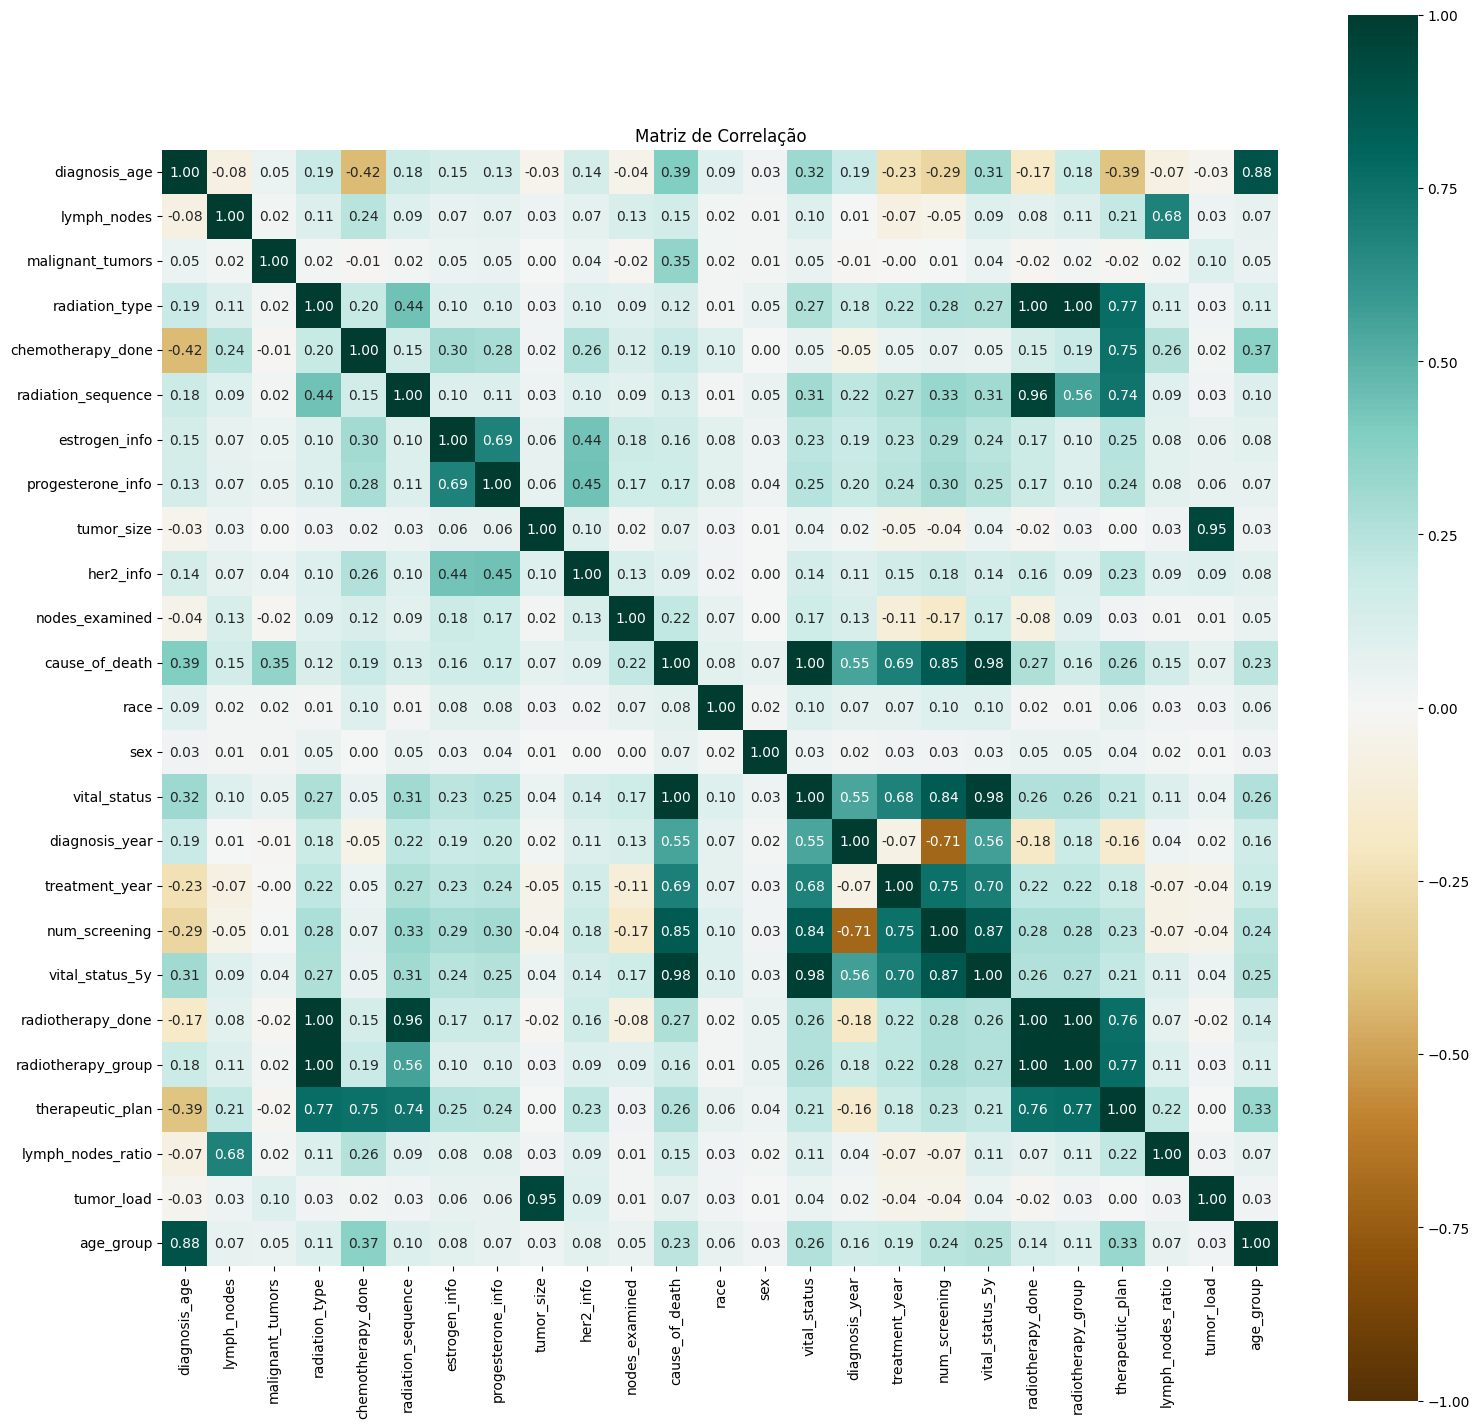

In [63]:
from dython.nominal import associations

assoc = associations(
    df,
    figsize=(18, 18),
    cmap="BrBG",
    title="Matriz de Correlação"
)

Como podemos ver, as variáveis `cause_of_death`, `vital status`, `num_screening`, e `treatment_year` estão altamente correlacionadas com a variável alvo, especialmente as duas primeiras. Sendo assim, vamos eliminar as duas primeiras variáveis e manter as outras duas em observação. Assim, caso ocorra overfitting ou data leakage poderemos investigar essas duas variáveis.

In [64]:
df = df.drop(["vital_status", "cause_of_death", "num_screening", "treatment_year"], axis=1)

Antes de prosseguirmos, vamos checar se os valores da variável alvo estão desbalanceados ou não.

In [65]:
100*df["vital_status_5y"].value_counts(normalize=True)

vital_status_5y
Alive    66.208379
Dead     33.791621
Name: proportion, dtype: float64

Como podemos ver, temos um desbalanceamento moderado, então devemos considerar isso nas próximas etapas.

### Preprocessamento de Dados

Vamos preprocessar nossos dados antes de fazer o treinamento. Primeiro vamos separar a variável alvo das features.

In [66]:
X = df.drop("vital_status_5y", axis=1)
y_raw = df["vital_status_5y"]

Vamos codificar a variável alvo para ela ter os valores `0` para `Alive` e `1` para `Dead`.

In [67]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y_raw)

Agora, vamos fazer a divisão estratificada dos dados em dados de treinamento e dados de teste.

In [68]:
from sklearn.model_selection import train_test_split

train_size = 0.7
random_state = 42

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size=train_size,
    random_state=random_state,
    stratify=y
)

Agora, vamos criar nosso `Pipeline` para imputar valores nos dados faltantes, codificar as variáveis categóricas, normalizar os valores das variáveis e fazer a seleção de features.

In [69]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import VarianceThreshold

numeric_columns = X.select_dtypes(include="number").columns.to_list()
categorical_columns = X.select_dtypes(include="object").columns.to_list()

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", MinMaxScaler()),
    # ("selection", VarianceThreshold(threshold=0.01))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", drop="first")),
    # ("selection", VarianceThreshold(threshold=0.01))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_columns),
        ("cat", categorical_transformer, categorical_columns)
    ],
    remainder="passthrough"
)

### Treinamento do Modelo

Para fazer as predições do status de vida dos pacientes usaremos o modelo `XGBoost` por sua robustez, precisão e eficiência. Além disso, iremos usar validação cruzada para obtermos um score robusto e iremos otimizar os hiperparâmetros do XGBoost usando a biblioteca `Optuna`. Após encontrarmos os hiperparâmetros adequados, prosseguiremos com a validação do modelo.

Primeiro, vamos criar a função que o Optuna tentará otimizar. Nela nós definimos os hiperparâmetros do modelo (que o Optuna escolhe de maneira inteligente), o modelo em si, o pipeline de treinamento e a validação cruzada. Como essa função retorna a média do score AUC calculado com a validação cruzada, no final o Optuna tentará otimizar o AUC do nosso modelo.

In [70]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train),
    y=y_train
)

weight_alive = class_weights[0]
weight_dead = class_weights[1]

conditions = [
    (y_train == 0),
    (y_train == 1) & (X_train["diagnosis_age"] < 45),
    (y_train == 1) & (X_train["diagnosis_age"] >= 45) & (X_train["diagnosis_age"] < 65),
    (y_train == 1) & (X_train["diagnosis_age"] >= 65),
]

choices = [
    weight_alive,
    weight_dead * 2.0,
    weight_dead * 2.0,
    weight_dead
]

sample_weight = np.select(conditions, choices)

print(weight_alive, weight_dead)

for i in conditions:
    print(len(y_train[i]))

0.7551730452298114 1.4797273053462505
16383
621
2596
5144


In [71]:
import optuna
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

kfold_strategy = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=random_state
)

fit_params = {
    "model__sample_weight": sample_weight,
    # "model__early_stopping_rounds": 50,
}

def objective(trial):
    param_grid = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "max_depth": trial.suggest_int("max_depth", 2, 10),
        "min_child_weight": trial.suggest_float("min_child_weight", 1, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.001, 10),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.001, 10)
    }

    model = XGBClassifier(
        **param_grid,
        objective="binary:logistic",
        eval_metric="aucpr",
        use_label_encoder=False,
        random_state=random_state,
        verbosity=0,
        n_jobs=-1
    )
    
    pipeline_completo = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    scores = cross_val_score(
        pipeline_completo,
        X_train,
        y_train,
        cv=kfold_strategy,
        params=fit_params,
        scoring="roc_auc",
        n_jobs=-1
    )
    
    return np.mean(scores)

Agora, com a função objetivo do Optuna definida, vamos buscar os hiperparâmetros ótimos.

In [72]:
study = optuna.create_study(
    direction="maximize",
    pruner=optuna.pruners.PercentilePruner(25.0, n_startup_trials=5)
)

study.optimize(
    objective,
    n_trials=10,
    show_progress_bar=True,
    n_jobs=-1
)

[I 2025-11-25 22:41:36,348] A new study created in memory with name: no-name-e2211b0f-785b-4481-b18b-9a578f928329
Best trial: 3. Best value: 0.933221:  10%|█         | 1/10 [00:07<01:07,  7.51s/it]

[I 2025-11-25 22:41:43,852] Trial 3 finished with value: 0.9332211744282723 and parameters: {'n_estimators': 780, 'max_depth': 6, 'min_child_weight': 9.073936056385667, 'learning_rate': 0.011126216372645298, 'subsample': 0.5778524396901836, 'colsample_bytree': 0.7515208645710196, 'gamma': 2.0346611119773215, 'reg_alpha': 0.6650654219178924, 'reg_lambda': 4.86295587546398}. Best is trial 3 with value: 0.9332211744282723.


Best trial: 3. Best value: 0.933221:  20%|██        | 2/10 [00:10<00:38,  4.85s/it]

[I 2025-11-25 22:41:46,822] Trial 2 finished with value: 0.9322325800203792 and parameters: {'n_estimators': 349, 'max_depth': 10, 'min_child_weight': 4.180988324076252, 'learning_rate': 0.032425246890261175, 'subsample': 0.749468557505474, 'colsample_bytree': 0.9595228476399127, 'gamma': 3.3788028215482018, 'reg_alpha': 0.14171641744923108, 'reg_lambda': 0.812440088700393}. Best is trial 3 with value: 0.9332211744282723.


Best trial: 3. Best value: 0.933221:  30%|███       | 3/10 [00:11<00:22,  3.20s/it]

[I 2025-11-25 22:41:48,068] Trial 0 finished with value: 0.9332052560578937 and parameters: {'n_estimators': 366, 'max_depth': 9, 'min_child_weight': 8.307208626516104, 'learning_rate': 0.02516725853543379, 'subsample': 0.787943280377996, 'colsample_bytree': 0.6517018069296824, 'gamma': 1.1618014499457874, 'reg_alpha': 9.148918205528481, 'reg_lambda': 3.013066724071165}. Best is trial 3 with value: 0.9332211744282723.


Best trial: 3. Best value: 0.933221:  40%|████      | 4/10 [00:12<00:13,  2.24s/it]

[I 2025-11-25 22:41:48,845] Trial 1 finished with value: 0.9300192527115486 and parameters: {'n_estimators': 446, 'max_depth': 6, 'min_child_weight': 5.59677979393554, 'learning_rate': 0.0431570797271743, 'subsample': 0.667266368322625, 'colsample_bytree': 0.928424089919366, 'gamma': 0.3269023306080937, 'reg_alpha': 3.3649107993077974, 'reg_lambda': 1.5922291785929188}. Best is trial 3 with value: 0.9332211744282723.


Best trial: 3. Best value: 0.933221:  50%|█████     | 5/10 [00:13<00:08,  1.77s/it]

[I 2025-11-25 22:41:49,758] Trial 4 finished with value: 0.933098504774773 and parameters: {'n_estimators': 286, 'max_depth': 4, 'min_child_weight': 1.053044619921519, 'learning_rate': 0.05449584805277416, 'subsample': 0.628627290325742, 'colsample_bytree': 0.6714945989288674, 'gamma': 2.4590076495683046, 'reg_alpha': 2.2794263869323768, 'reg_lambda': 4.339725692483514}. Best is trial 3 with value: 0.9332211744282723.


Best trial: 3. Best value: 0.933221:  60%|██████    | 6/10 [00:14<00:06,  1.56s/it]

[I 2025-11-25 22:41:50,935] Trial 5 finished with value: 0.9310176229312519 and parameters: {'n_estimators': 219, 'max_depth': 8, 'min_child_weight': 9.58294625790373, 'learning_rate': 0.007451230501568459, 'subsample': 0.9680601237745368, 'colsample_bytree': 0.8465372564678791, 'gamma': 1.4737874814379837, 'reg_alpha': 5.548098195471942, 'reg_lambda': 8.706921423677526}. Best is trial 3 with value: 0.9332211744282723.


Best trial: 3. Best value: 0.933221:  70%|███████   | 7/10 [00:17<00:06,  2.06s/it]

[I 2025-11-25 22:41:54,031] Trial 6 finished with value: 0.9316061193733052 and parameters: {'n_estimators': 381, 'max_depth': 10, 'min_child_weight': 7.1246127444580925, 'learning_rate': 0.0019593372317631623, 'subsample': 0.6277688001913506, 'colsample_bytree': 0.7010092428445063, 'gamma': 0.2745173444898552, 'reg_alpha': 2.1449248226088673, 'reg_lambda': 5.910406946771008}. Best is trial 3 with value: 0.9332211744282723.


Best trial: 7. Best value: 0.933281:  80%|████████  | 8/10 [00:19<00:04,  2.12s/it]

[I 2025-11-25 22:41:56,249] Trial 7 finished with value: 0.9332814809897518 and parameters: {'n_estimators': 968, 'max_depth': 5, 'min_child_weight': 7.629313363256433, 'learning_rate': 0.03033186458947119, 'subsample': 0.9343791332109248, 'colsample_bytree': 0.8533106394383986, 'gamma': 3.329292954829311, 'reg_alpha': 1.1509651544410606, 'reg_lambda': 9.975179776206055}. Best is trial 7 with value: 0.9332814809897518.


Best trial: 7. Best value: 0.933281:  90%|█████████ | 9/10 [00:21<00:01,  1.96s/it]

[I 2025-11-25 22:41:57,901] Trial 8 finished with value: 0.9161477143907865 and parameters: {'n_estimators': 690, 'max_depth': 2, 'min_child_weight': 2.854896731737398, 'learning_rate': 0.0037881392452485344, 'subsample': 0.6237927889297372, 'colsample_bytree': 0.8617278125717436, 'gamma': 1.2689942489421617, 'reg_alpha': 2.543958208399869, 'reg_lambda': 3.6358414537786943}. Best is trial 7 with value: 0.9332814809897518.


Best trial: 7. Best value: 0.933281: 100%|██████████| 10/10 [00:23<00:00,  2.37s/it]

[I 2025-11-25 22:42:00,099] Trial 9 finished with value: 0.9309885530758082 and parameters: {'n_estimators': 759, 'max_depth': 2, 'min_child_weight': 7.824887965584506, 'learning_rate': 0.2049255059863697, 'subsample': 0.8043581716508799, 'colsample_bytree': 0.8923135554327983, 'gamma': 0.7070287501063965, 'reg_alpha': 6.110235069388089, 'reg_lambda': 5.444511459957657}. Best is trial 7 with value: 0.9332814809897518.


Podemos então guardar nossos hiperparâmetros ótimos e usá-los para criar nosso modelo real.

In [73]:
auc = study.best_value
params = study.best_params

print(f"AUC do melhor modelo encontrado: {auc}\n")
print("Melhores hiperparâmetros:\n")

for param, value in params.items():
    print(f"{param}: {value}")

AUC do melhor modelo encontrado: 0.9332814809897518

Melhores hiperparâmetros:

n_estimators: 968
max_depth: 5
min_child_weight: 7.629313363256433
learning_rate: 0.03033186458947119
subsample: 0.9343791332109248
colsample_bytree: 0.8533106394383986
gamma: 3.329292954829311
reg_alpha: 1.1509651544410606
reg_lambda: 9.975179776206055


Vamos então criar nosso modelo e o `Pipeline` de treinamento dele.

In [74]:
model = XGBClassifier(
    **params,
    objective="binary:logistic",
    eval_metric="aucpr",
    use_label_encoder=False,
    random_state=random_state,
    verbosity=0,
    n_jobs=-1
)

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", model)
])

pipeline.fit(X_train, y_train, model__sample_weight=sample_weight)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


### Validação e Métricas de Desempenho

Vamos validar nosso modelo com algumas métricas de desempenho divididas pelas faixa etárias dos pacientes.

In [75]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    roc_auc_score,
    f1_score
)

X_test_seg = {"full": X_test}
y_test_seg = {"full": y_test}
y_pred_seg = {"full": pipeline.predict(X_test)}
y_prob_seg = {"full": pipeline.predict_proba(X_test)[:, 1]}

for name, group in X_test.groupby("age_group"):
    X_test_seg[name] = group
    y_test_seg[name] = le.fit_transform(df["vital_status_5y"].iloc[group.index.values])
    y_pred_seg[name] = pipeline.predict(group)
    y_prob_seg[name] = pipeline.predict_proba(group)[:, 1]

seg_names = {
    "full": "Todas as idades",
    "less_45": "Menos de 45 anos",
    "between_45_65": "Entre 45 e 65 anos",
    "greater_65": "Mais de 65 anos",
}

metric_names = ["Acurácia", "Precisão", "Recall", "F1-Score", "AUC"]
metric_columns = ["full", "less_45", "between_45_65", "greater_65"]

metrics_df = pd.DataFrame(index=metric_names)

for column in metric_columns:
    name = seg_names[column]
    
    y_test_group = y_test_seg[column]
    y_pred = y_pred_seg[column]
    y_prob = y_prob_seg[column]

    metrics_df[name] = [
        accuracy_score(y_test_group, y_pred),
        precision_score(y_test_group, y_pred),
        recall_score(y_test_group, y_pred),
        f1_score(y_test_group, y_pred),
        roc_auc_score(y_test_group, y_prob),
    ]

metrics_df.round(2)

,Todas as idades,Menos de 45 anos,Entre 45 e 65 anos,Mais de 65 anos
Acurácia,0.87,0.87,0.88,0.85
Precisão,0.79,0.66,0.72,0.84
Recall,0.84,0.79,0.82,0.86
F1-Score,0.81,0.72,0.77,0.85
AUC,0.94,0.92,0.93,0.93


Vamos analisar também a matriz de confusão do nosso modelo nas diferentes faixa etárias

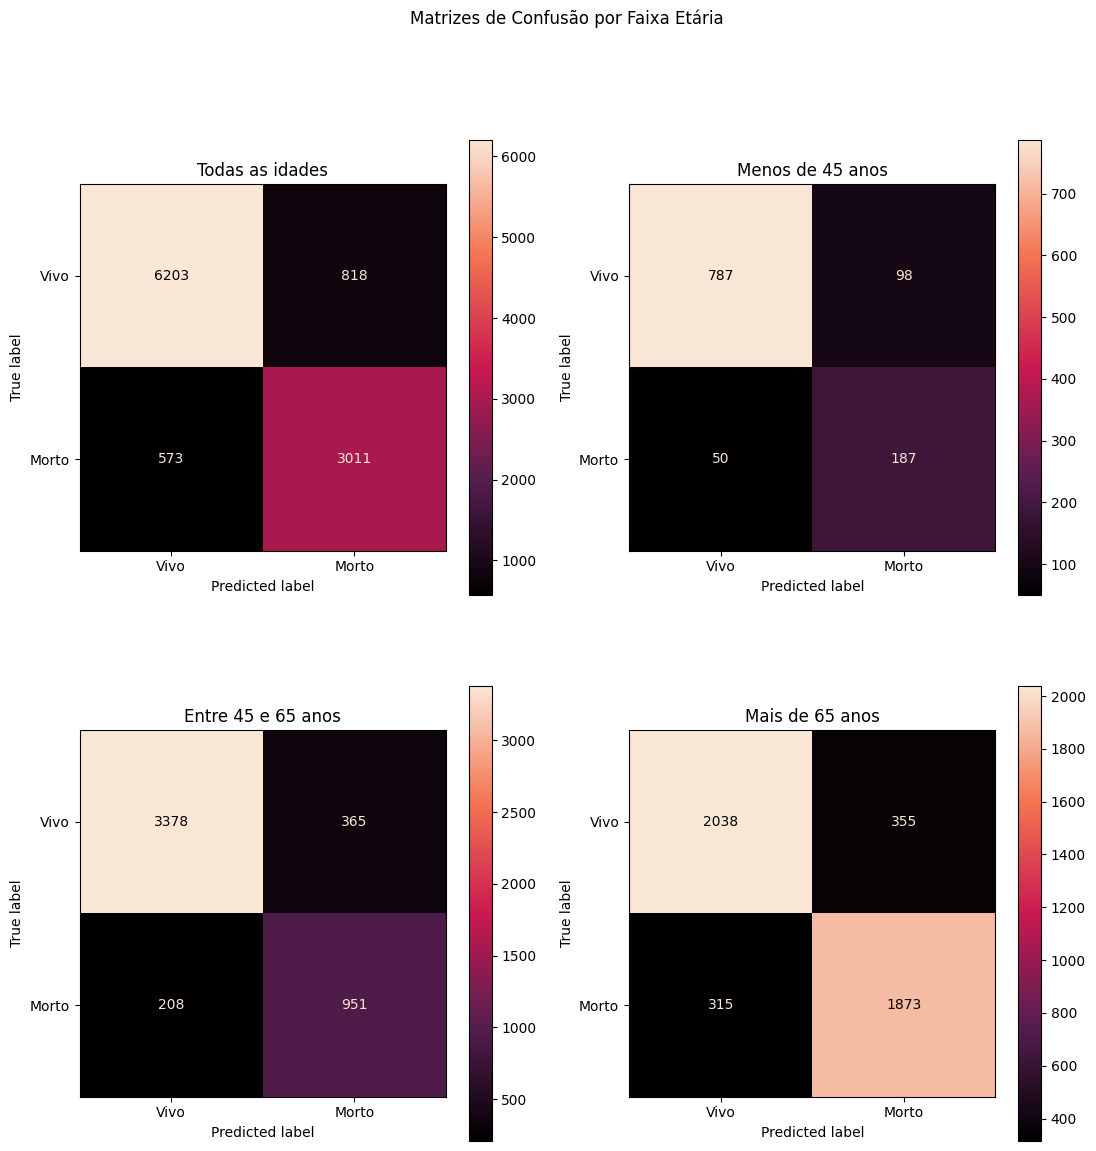

In [76]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay
)

colors = [
    "#000000",
    "#541E4F",
    "#C91950",
    "#F37652",
    "#F9E6D5"
]

cmap = LinearSegmentedColormap.from_list("bonitinho", colors)
fig, axes = plt.subplots(2, 2, figsize=(13, 13))
axes = axes.flatten()

for ax, column in zip(axes, metric_columns):
    cm = confusion_matrix(y_test_seg[column], y_pred_seg[column])

    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=["Vivo", "Morto"],
    )
    disp.plot(ax=ax, cmap=cmap)
    ax.set_title(seg_names[column])

plt.suptitle("Matrizes de Confusão por Faixa Etária")
plt.show()

In [77]:
from sklearn.metrics import classification_report

for column in metric_columns:
    print(seg_names[column])
    print(classification_report(y_test_seg[column], y_pred_seg[column], target_names=["Vivo", "Morto"]))

Todas as idades
              precision    recall  f1-score   support

        Vivo       0.92      0.88      0.90      7021
       Morto       0.79      0.84      0.81      3584

    accuracy                           0.87     10605
   macro avg       0.85      0.86      0.86     10605
weighted avg       0.87      0.87      0.87     10605

Menos de 45 anos
              precision    recall  f1-score   support

        Vivo       0.94      0.89      0.91       885
       Morto       0.66      0.79      0.72       237

    accuracy                           0.87      1122
   macro avg       0.80      0.84      0.82      1122
weighted avg       0.88      0.87      0.87      1122

Entre 45 e 65 anos
              precision    recall  f1-score   support

        Vivo       0.94      0.90      0.92      3743
       Morto       0.72      0.82      0.77      1159

    accuracy                           0.88      4902
   macro avg       0.83      0.86      0.85      4902
weighted avg       0.8

### Prescrição de Tratamento

Agora, para prescrever o tratamento para o paciente, faremos uma simulação contrafactual. Criaremos alguns clones do paciente variando o tratamento e calculamos as probabilidades de sobrevivência do paciente com os diferentes tipos de tratamento. Pegamos então o clone que obteve o melhor resultado e recomandamos o tratamento dele ao nosso paciente.

--- Tabela de Decisão Clínica ---
               Scenario Survival (%) Gain (%)
  Combo (Chemo + Radio)       66.97%   +3.75%
    Surgery + Radiation       66.81%   +3.59%
        Surgery + Chemo       65.52%   +2.30%
Surgery Only (Baseline)       63.22%   +0.00%


/tmp/ipykernel_733461/2595744395.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_results, x='Survival_Prob', y='Scenario', palette='viridis')


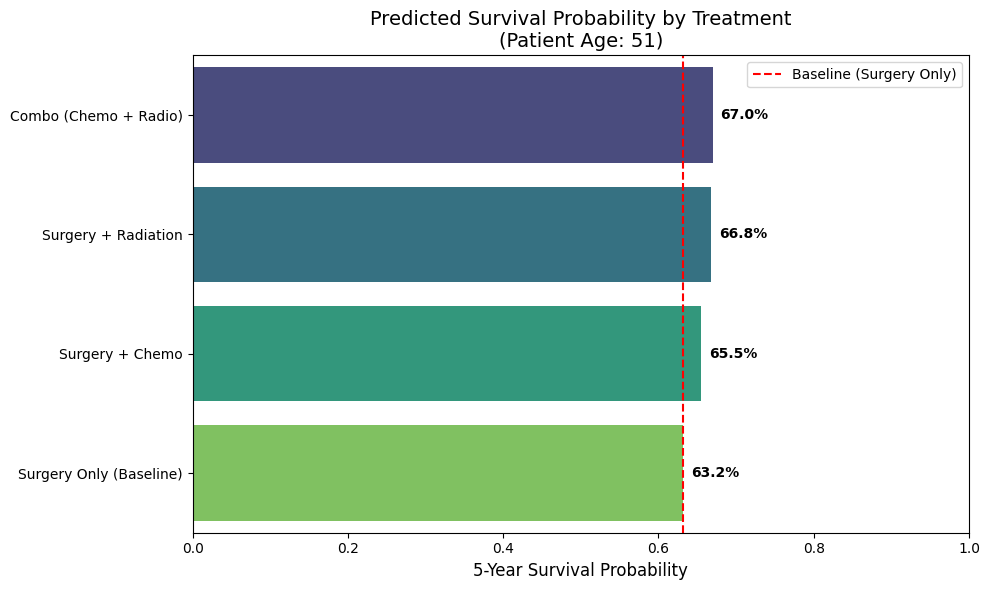

In [89]:
import seaborn as sns

def recommend_treatment(patient_data):
    """
    Simulates treatment scenarios and returns a DataFrame with 
    Survival Probabilities for each.
    """
    
    scenarios = [
        {"name": "Surgery Only (Baseline)", "chemo": 0, "radio": 0},
        {"name": "Surgery + Chemo",         "chemo": 1, "radio": 0},
        {"name": "Surgery + Radiation",     "chemo": 0, "radio": 1},
        {"name": "Combo (Chemo + Radio)",   "chemo": 1, "radio": 1}
    ]
    
    results = []
    
    for scenario in scenarios:
        patient_clone = patient_data.copy()
        
        patient_clone["chemotherapy_done"] = scenario["chemo"]
        patient_clone["radiation_flag"] = scenario["radio"] # Or "radiation_type" logic
        
        if "therapeutic_plan" in patient_clone.columns:
            patient_clone["therapeutic_plan"] = scenario["chemo"] + scenario["radio"]

        if "radiation_sequence" in patient_clone.columns:
            if scenario["radio"] == 1:
                patient_clone["radiation_sequence"] = "Radiation after surgery"
            else:
                patient_clone["radiation_sequence"] = "No radiation and/or cancer-directed surgery"

        probs = pipeline.predict_proba(patient_clone)[0]
        prob_death = probs[1]
        prob_survival = 1 - prob_death
        
        results.append({
            "Scenario": scenario["name"],
            "Survival_Prob": prob_survival,
            "Death_Risk": prob_death
        })
        
    df_results = pd.DataFrame(results)
    
    baseline_val = df_results[df_results["Scenario"] == "Surgery Only (Baseline)"]["Survival_Prob"].values[0]
    df_results["Gain_vs_Baseline"] = df_results["Survival_Prob"] - baseline_val
    
    df_display = df_results.copy()
    df_display["Survival (%)"] = df_display["Survival_Prob"].apply(lambda x: f"{x:.2%}")
    df_display["Gain (%)"] = df_display["Gain_vs_Baseline"].apply(lambda x: f"{x:+.2%}")
    
    df_display = df_display.sort_values(by="Survival_Prob", ascending=False)
    
    return df_display[["Scenario", "Survival (%)", "Gain (%)", "Survival_Prob"]]

def plot_recommendations(df_results, patient_age):
    """
    Plots the survival probabilities for easier comparison.
    """
    plt.figure(figsize=(10, 6))
    
    sns.barplot(data=df_results, x="Survival_Prob", y="Scenario", palette="viridis")
    
    baseline_val = df_results[df_results["Scenario"] == "Surgery Only (Baseline)"]["Survival_Prob"].values[0]
    plt.axvline(baseline_val, color="red", linestyle="--", label="Baseline (Surgery Only)")
    
    plt.title(f"Predicted Survival Probability by Treatment\n(Patient Age: {patient_age})", fontsize=14)
    plt.xlabel("5-Year Survival Probability", fontsize=12)
    plt.ylabel("")
    plt.xlim(0, 1.0)
    plt.legend()
    
    for index, value in enumerate(df_results["Survival_Prob"]):
        plt.text(value + 0.01, index, f"{value:.1%}", va="center", fontweight="bold")
        
    plt.tight_layout()
    plt.show()

# --- COMO USAR ---

# 1. Pegue um paciente
sample_patient = X_test.iloc[[0]]

# 2. Gere a tabela
recommendation_table = recommend_treatment(sample_patient)

# 3. Mostre a tabela numérica
print("--- Tabela de Decisão Clínica ---")
print(recommendation_table.drop(columns=["Survival_Prob"]).to_string(index=False))

plot_recommendations(recommendation_table, sample_patient["diagnosis_age"].values[0])

### Explicabilidade com SHAP

Agora, para tornar nosso modelo explicável, usamos o SHAP para calcular a importância de cada feature e para calcular os SHAP values, importantes para explicar as decisões do modelo ao paciente.

Calculando valores SHAP... (isso pode demorar um pouco)


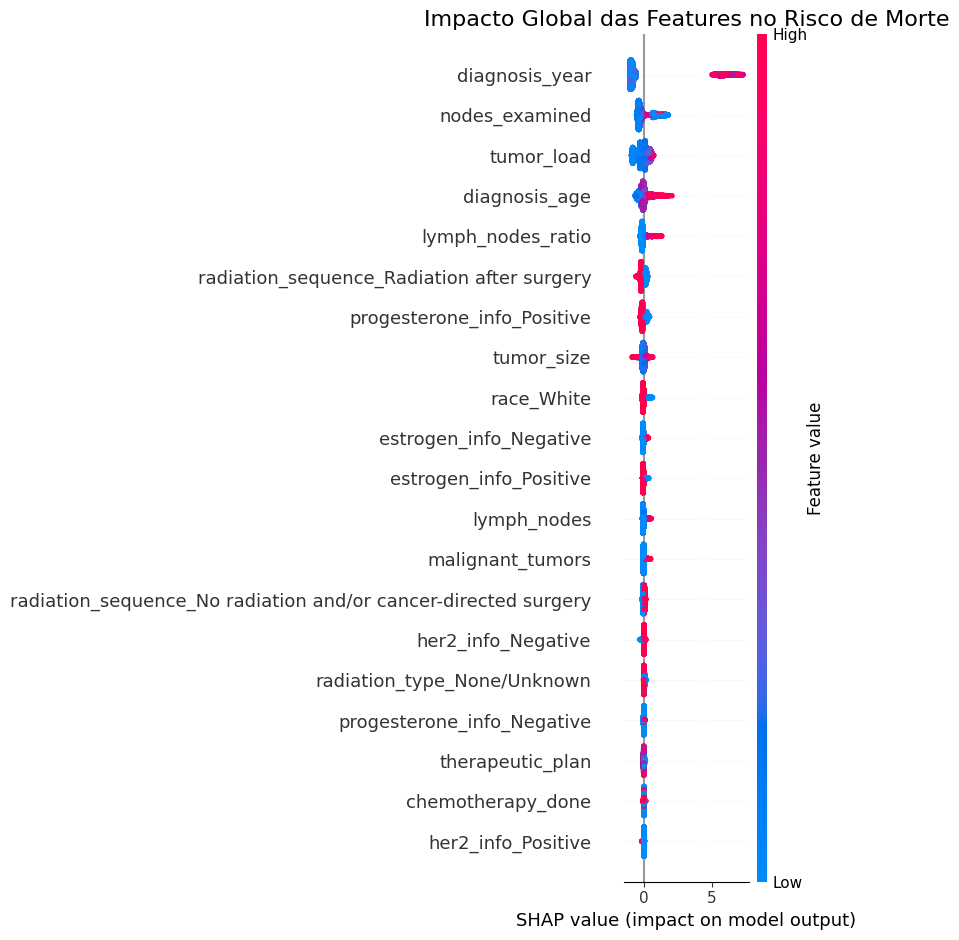

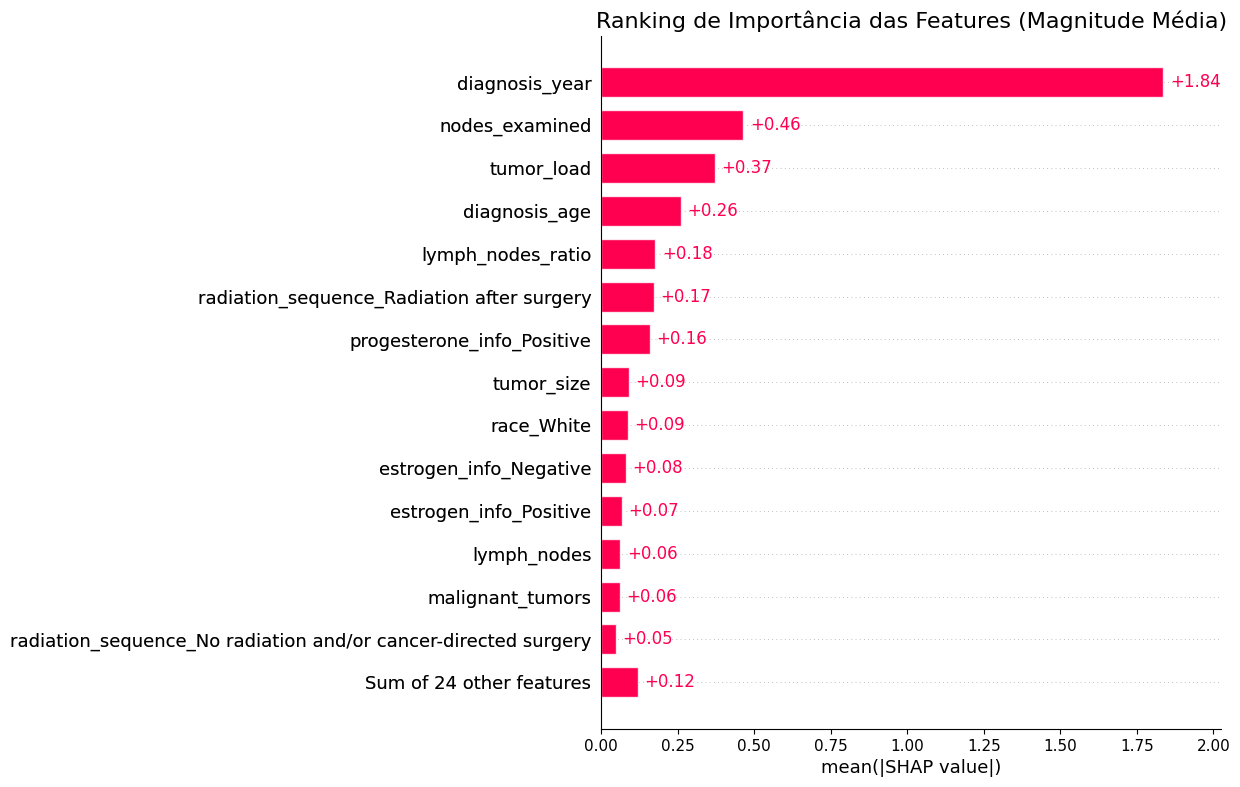

--- Explicando Paciente índice 0 ---


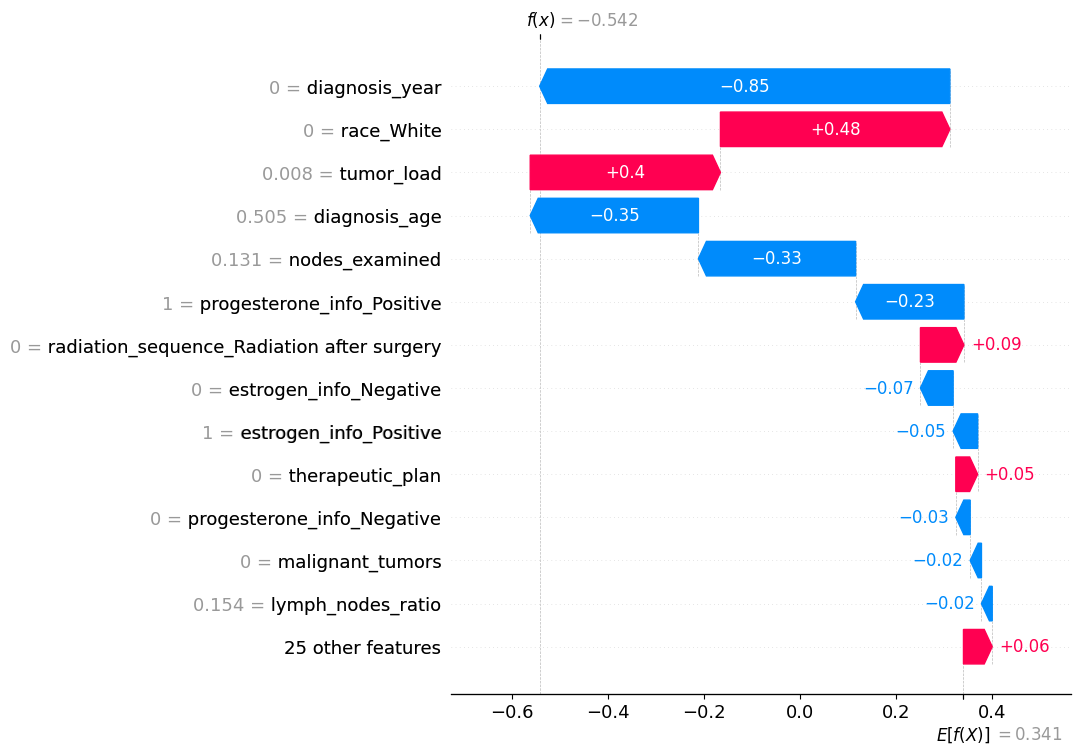


Exemplo de Paciente de ALTO RISCO:
--- Explicando Paciente índice 3 ---


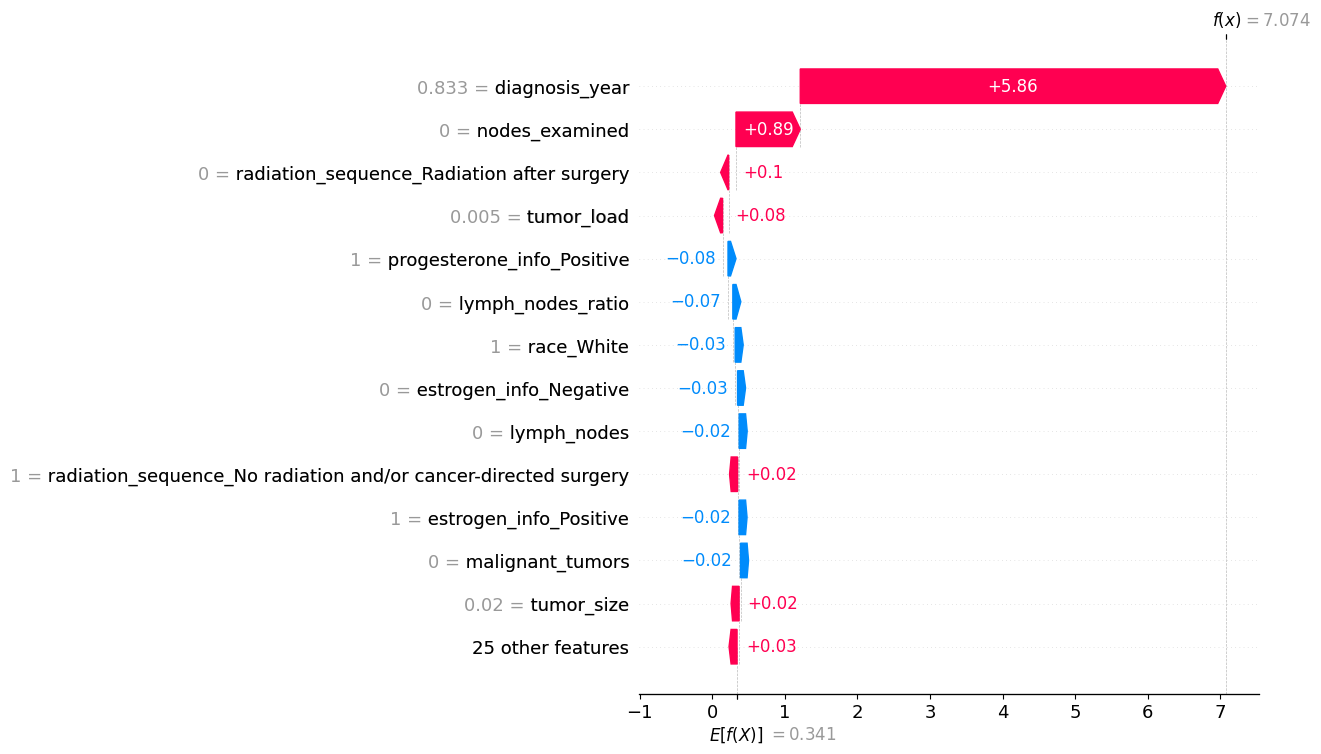

In [91]:
import shap

preprocessor = pipeline.named_steps["preprocessor"]

X_test_transformed = preprocessor.transform(X_test)
feature_names = preprocessor.get_feature_names_out()
feature_names = [f.split('__')[-1] for f in feature_names]

X_test_shap_df = pd.DataFrame(
    X_test_transformed, 
    columns=feature_names,
    index=X_test.index
)

print("Calculando valores SHAP... (isso pode demorar um pouco)")
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_test_shap_df)

# Este é o gráfico mais rico em informação.
# - Eixo Y: Features
# - Eixo X: Impacto no modelo (Negativo = Chance de Vida, Positivo = Risco de Morte)
# - Cor: Valor da feature (Vermelho = Alto, Azul = Baixo)
plt.figure(figsize=(12, 10))
plt.title("Impacto Global das Features no Risco de Morte", fontsize=16)
shap.summary_plot(shap_values, X_test_shap_df, show=False)
plt.show()

plt.figure(figsize=(10, 8))
plt.title("Ranking de Importância das Features (Magnitude Média)", fontsize=16)
shap.plots.bar(shap_values, max_display=15, show=False)
plt.show()

def explicar_paciente(id_paciente_iloc):
    """
    Gera um gráfico Waterfall para explicar a decisão de um paciente específico.
    """
    print(f"--- Explicando Paciente índice {id_paciente_iloc} ---")
    
    shap.plots.waterfall(shap_values[id_paciente_iloc], max_display=14)

# Exemplo: Explicar o primeiro paciente do teste
explicar_paciente(0)

y_pred = pipeline.predict(X_test)
indices_risco_alto = np.where(y_pred == 1)[0]

if len(indices_risco_alto) > 0:
    idx_risco = indices_risco_alto[0] # Pegar o primeiro paciente de alto risco
    print("\nExemplo de Paciente de ALTO RISCO:")
    explicar_paciente(idx_risco)

### Salvar o modelo em disco

Por fim, vamos salvar o modelo em disco para usos futuros.

In [97]:
import joblib

# Assumindo que 'final_pipeline' é o modelo treinado com os pesos otimizados
# e 'X_train' são seus dados de treino.

model_package = {
    "pipeline": pipeline,
    "expected_columns": X_train.columns.tolist(),
    "global_treshold": 0.5,
    "version": "1.0"
}

joblib.dump(model_package, "model_package.joblib")

['model_package.joblib']